<img src="images/strathclyde_banner.png" width="50%" align="left" style="left">

# 3. QAM Modulation and Demodulation <a class="anchor" id="QAM"></a>

“Quadrature Amplitude Modulation (QAM) is a common form of modulation in wireless communication, and can be seen in many modern radio communications systems. This scheme uses the principle of orthogonality to transmit two information signals within the same bandwidth. One signal is modulated on a sine wave at $f_{c}$ Hz, and a second signal is independently modulated on to a cosine wave also at $f_{c}$ Hz (i.e. 90 degrees out of phase, or orthogonal). The sine / cosine carrier signals can also be expressed as a single complex carrier, as will be discussed in the notebook following this one.”

## Table of Contents

* [3. QAM and QAM Demodulation](03_QAM_modulation.ipynb)
    * [3.1 QAM Modulation](#QAM_mod)
    * [3.2 QAM Demodulation](#QAM_demod)
    * [3.3 Phase Error With QAM](#QAM_phase_error)
    * [3.4 Conclusion](#conclusion)

**Import Libraries**

For this notebook we will be using NumPy for computation and MatplotLib for Matlab-like visualisation of our waveforms.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 3.1 QAM Modulation <a class="anchor" id="QAM_mod"></a>

Quadrature Amplitude Modulation can be used to achieve more bandwidth-efficient signalling. Using this approach, two signals are transmitted on a single complex carrier. The RF QAM transmitter can be seen in [Figure 1](#fig-1).

<a class="anchor" id="fig-1"></a>
<figure>
<img src='./images/QAM_Mod.png' height='30%' width='30%'/>
    <figcaption><b>Figure 1: QAM Modulation</b></figcaption>
</figure>

First we must establish the parameters which will be used throughout the notebook. These match those seen in the Amplitude Modulation notebook, with the addition of a second baseband frequency for our second information signal.

In [2]:
# Set basic params
fs = 4096e6 # sample rate
fb = 64e6 # frequency of baseband signal
fb2 = 32e6 # frequency of second baseband signal
A1 = 2 # baseband signal amplitude
A2 = 1 # second baseband signal amplitude
N_fft = 2048 # fft size

t = np.arange(N_fft)/fs #time scale

We now describe two information signals. For this demonstration, $g_{1}(t)$ is the same tone as used previously, whilst $g_{2}(t)$ is a tone at a lower frequency. In this way, both tones can be transmitted using the same bandwidth as shown in the previous example.

In [3]:
g1 = A1*np.cos(2*np.pi*fb*t)
g2 = A2*np.cos(2*np.pi*fb2*t)

In [4]:
# Calculate FFT
g1_fft_result = np.fft.fft(g1, N_fft)
g2_fft_result = np.fft.fft(g2, N_fft)

# Get the corresponding frequencies, that depend on N_fft and Fs - freq. domain x axis
freqs = np.fft.fftfreq(N_fft,1/fs)

These two signals can be plotted together on time and frequency domains.

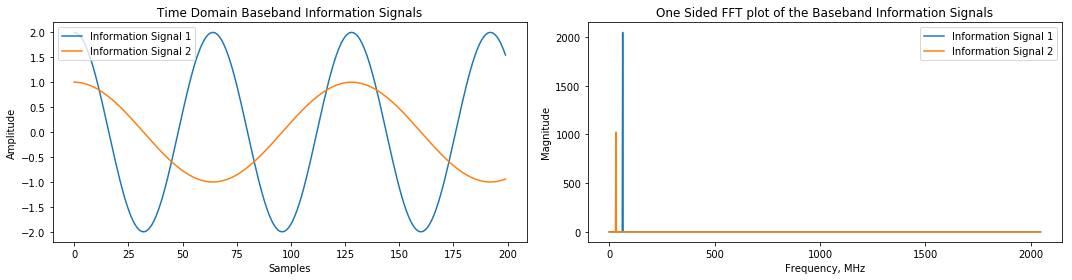

In [5]:
fig, axs = plt.subplots(1,2, figsize=(15,4))
axs[0].plot(g1[:200])
axs[0].plot(g2[:200])
axs[0].set_title('Time Domain Baseband Information Signals')
axs[0].set_xlabel('Samples')
axs[0].set_ylabel('Amplitude')
axs[0].legend(('Information Signal 1', 'Information Signal 2'))

axs[1].plot(freqs[:int(N_fft/2)]/1e6, np.abs(g1_fft_result[:int(N_fft/2)]))
axs[1].plot(freqs[:int(N_fft/2)]/1e6, np.abs(g2_fft_result[:int(N_fft/2)]))
axs[1].set_title('One Sided FFT plot of the Baseband Information Signals')
axs[1].set_ylabel('Magnitude')
axs[1].set_xlabel('Frequency, MHz')
axs[1].legend(('Information Signal 1', 'Information Signal 2'))
fig.tight_layout()

These two information signals are mixed (modulated) using In Phase and Quadrature carriers to give modulated signals which are 90 degrees out of phase.

$s_{1}(t) = g_{1}(t) \cos(2 \pi f_{c} t)$

$s_{2}(t) = -g_{2}(t) \sin(2 \pi f_{c} t)$

Where $f_{c}$ is the carrier frequency used in the previous example.

In [6]:
fc = 900e6 # Carrier Frequency 

# Find I and Q modulated signals
s1 = g1*np.cos(2*np.pi*fc*t)
s2 = -g2*np.sin(2*np.pi*fc*t)

In [7]:
# Find FFT of modulated signals
s1_fft_result = np.fft.fft(s1, N_fft)
s2_fft_result = np.fft.fft(s2, N_fft)

We can now plot the I and Q modulated signals. It is clear in the frequency domain that the bandwidth remains $2f_{b}$ as we can see maximum and minimum frequency responses at $f_{c} - f_{b1}$ and $f_{c} + f_{b1}$ respectively.

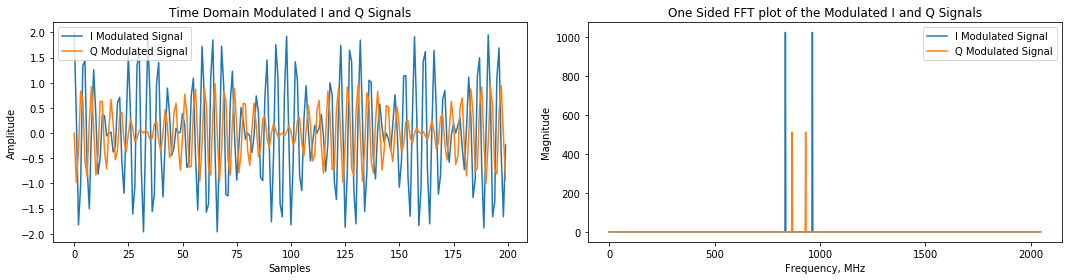

In [8]:
fig, axs = plt.subplots(1,2, figsize=(15,4))
axs[0].plot(s1[:200])
axs[0].plot(s2[:200])
axs[0].set_title('Time Domain Modulated I and Q Signals')
axs[0].set_xlabel('Samples')
axs[0].set_ylabel('Amplitude')
axs[0].legend(('I Modulated Signal', 'Q Modulated Signal'))

axs[1].plot(freqs[:int(N_fft/2)]/1e6, np.abs(s1_fft_result[:int(N_fft/2)]))
axs[1].plot(freqs[:int(N_fft/2)]/1e6, np.abs(s2_fft_result[:int(N_fft/2)]))
axs[1].set_title('One Sided FFT plot of the Modulated I and Q Signals')
axs[1].set_ylabel('Magnitude')
axs[1].set_xlabel('Frequency, MHz')
axs[1].legend(('I Modulated Signal', 'Q Modulated Signal'))
fig.tight_layout()

These signals can then be summed together to create a single signal, $y(t)$, which contains both information signals. 

$y(t) = g_{1}(t) \cos(2 \pi f_{c} t) - g_{2}(t) \sin(2 \pi f_{c} t)$

This way, two signals can be transmitted using a bandwidth of $2f_{b}$.

Within Python, this is a simple case of summing together the two modulated signals, $s_{1}(t)$ and $s_{2}(t)$:

In [9]:
# Find sum of modulated signals
y = s1 + s2 # sum of modulated signals

In [10]:
# Find FFT of Summed Signal
y_fft_result = np.fft.fft(y, N_fft)

This signal can now be plotted as before. We see that in both time and frequency domains the new signal $y(t)$ is the summation of $s_{1}(t)$ and $s_{2}(t)$.

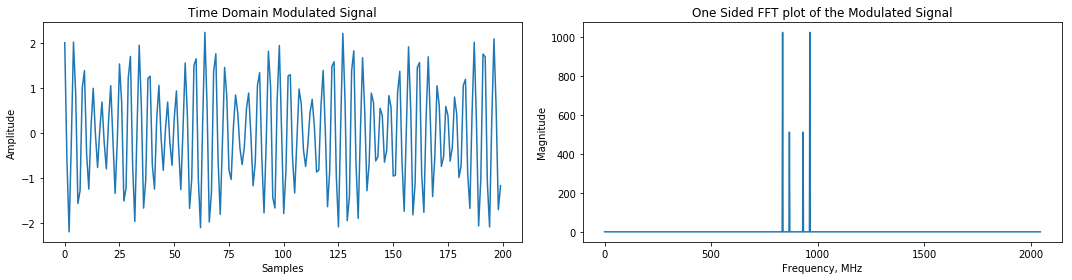

In [11]:
fig, axs = plt.subplots(1,2, figsize=(15,4))
axs[0].plot(y[:200])
axs[0].set_title('Time Domain Modulated Signal')
axs[0].set_xlabel('Samples')
axs[0].set_ylabel('Amplitude')

axs[1].plot(freqs[:int(N_fft/2)]/1e6, np.abs(y_fft_result[:int(N_fft/2)]))
axs[1].set_title('One Sided FFT plot of the Modulated Signal')
axs[1].set_ylabel('Magnitude')
axs[1].set_xlabel('Frequency, MHz')
fig.tight_layout()

## 3.2 QAM Demodulation <a class="anchor" id="QAM_demod"></a>

At the receiver, quadrature demodulation involves multiplying the received signal by sine and cosine terms. The RF QAM receiver can be seen in [Figure 2](#fig-2).

<a class="anchor" id="fig-2"></a>
<figure>
<img src='./images/QAM_Demod.png' height='30%' width='30%'/>
    <figcaption><b>Figure 2: QAM Demodulation</b></figcaption>
</figure>

For the In Phase channel, I, the output after the demodulator is:  

$x_{1}(t) = y(t) \cos(2 \pi f_{c} t)$

$x_{1}(t) = 0.5 g_{1}(t) + 0.5g_{1}(t) \cos(4 \pi f_{c} t) - 0.5 g_{2}(t) \sin (4 \pi f_{c} t)$

Similarly, for the Quadrature Phase channel, Q, the output after the demodulator is:

$x_{2}(t) = y(t)( -\sin(2 \pi f_{c} t))$

$x_{2}(t) = 0.5g_{2}(t) - 0.5g_{1}(t) \sin(4 \pi f_{c} t) + 0.5g_{2}(t) \cos (4 \pi f_{c} t)$

In [12]:
# Find demodulated signals - y(t)*(I or Q carrier)
x1 = y*np.cos(2*np.pi*fc*t) # I demodulated signal
x2 = y*(-np.sin(2*np.pi*fc*t)) # Q demodulated signal

In [13]:
# Find FFT of demodulated signals
x1_fft_result = np.fft.fft(x1, N_fft)
x2_fft_result = np.fft.fft(x2, N_fft)

As can be seen from the below plots, the desired baseband frequency components have been reconstructed, however as in Amplitude Modulation, unwanted high frequency components are still present in the signal.

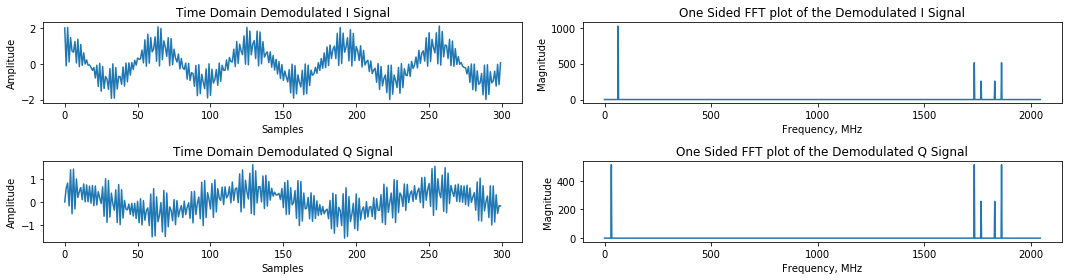

In [14]:
fig, axs = plt.subplots(2,2, figsize=(15,4))
axs[0, 0].plot(x1[:300])
axs[0, 0].set_title('Time Domain Demodulated I Signal')
axs[0, 0].set_xlabel('Samples')
axs[0, 0].set_ylabel('Amplitude')

axs[0, 1].plot(freqs[:int(N_fft/2)]/1e6, np.abs(x1_fft_result[:int(N_fft/2)]))
axs[0, 1].set_title('One Sided FFT plot of the Demodulated I Signal')
axs[0, 1].set_ylabel('Magnitude')
axs[0, 1].set_xlabel('Frequency, MHz')

axs[1, 0].plot(x2[:300])
axs[1, 0].set_title('Time Domain Demodulated Q Signal')
axs[1, 0].set_xlabel('Samples')
axs[1, 0].set_ylabel('Amplitude')

axs[1, 1].plot(freqs[:int(N_fft/2)]/1e6, np.abs(x2_fft_result[:int(N_fft/2)]))
axs[1, 1].set_title('One Sided FFT plot of the Demodulated Q Signal')
axs[1, 1].set_ylabel('Magnitude')
axs[1, 1].set_xlabel('Frequency, MHz')
fig.tight_layout()

Low pass filters are used to remove the high frequency terms so that the information can be perfectly recovered, as with amplitude modulation. 

In [15]:
# Define lowpass filter
f_cutoff = 0.1 # Cutoff frequency as a fraction of the sampling rate
b = 0.08  # Transition band, as a fraction of the sampling rate (in (0, 0.5)).

N = int(np.ceil((4 / b)))
if not N % 2: N += 1  # N is odd.
n = np.arange(N)

h = np.sinc(2 * f_cutoff * (n - (N - 1) / 2)) # Compute sinc filter.
w = np.blackman(N) # Compute Blackman window.
h = h * w # Multiply sinc filter by window.
h = h / np.sum(h) # Normalize to get unity gain.

In [16]:
# Apply filter to demodulated signals using convolution
z1 = np.convolve(x1, h)
z2 = np.convolve(x2, h)

In [17]:
# Find FFT of filtered signals
z1_fft_result = np.fft.fft(z1, N_fft)
z2_fft_result = np.fft.fft(z2, N_fft)

We can now plot the filtered signals in time and frequency domains. 

Notably the input information signals have both been preserved, however the amplitude of the signals have halved, the same as we observed in the previous example. This is because QAM is still a form of amplitude modulation and we accept that there will be an amplitude loss upon reconstruction. This can be easily corrected by applying a gain.

We can see that the final signals can be represented as:

$z_{1}(t) = 0.5g_{1}(t)$

$z_{2}(t) = 0.5g_{2}(t)$

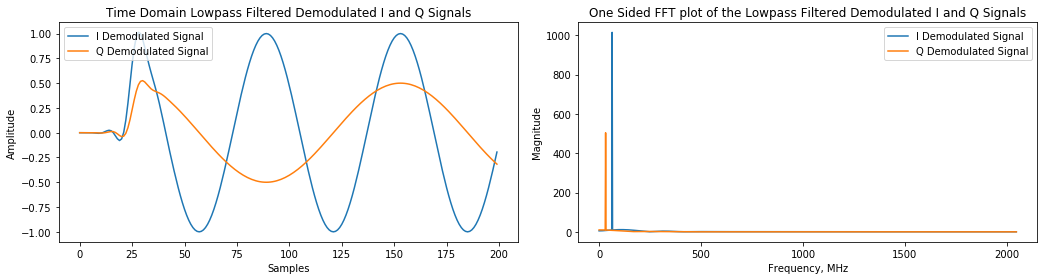

In [18]:
fig, axs = plt.subplots(1,2, figsize=(15,4))
axs[0].plot(z1[:200])
axs[0].plot(z2[:200])
axs[0].set_title('Time Domain Lowpass Filtered Demodulated I and Q Signals')
axs[0].set_xlabel('Samples')
axs[0].set_ylabel('Amplitude')
axs[0].legend(('I Demodulated Signal', 'Q Demodulated Signal'))

axs[1].plot(freqs[:int(N_fft/2)]/1e6, np.abs(z1_fft_result[:int(N_fft/2)]))
axs[1].plot(freqs[:int(N_fft/2)]/1e6, np.abs(z2_fft_result[:int(N_fft/2)]))
axs[1].set_title('One Sided FFT plot of the Lowpass Filtered Demodulated I and Q Signals')
axs[1].set_ylabel('Magnitude')
axs[1].set_xlabel('Frequency, MHz')
axs[1].legend(('I Demodulated Signal', 'Q Demodulated Signal'))
fig.tight_layout()

## 3.3 Phase Error With QAM <a class="anchor" id="QAM_phase_error"></a>

If the receiver's local oscillator is shifted by $\theta$ with respect to the received signal, then the In Phase and Quadrature output signals will be mixed. 

For the I channel:

$x_{1}(t) = y(t) \cos(2 \pi f_{c} t + \theta)$

$x_{1}(t) = 0.5 [g_{1}t \cos(\theta) + g_{2}(t) \sin(\theta)]$

For the Q channel:

$x_{2}(t) = y(t) (-\sin(2 \pi f_{c} t + \theta))$

$x_{2}(t) = 0.5 [-g_{1}t \sin(\theta) + g_{2}(t) \cos(\theta)]$

In [19]:
# Create phase shift
phaseshift = (np.pi/3) #60 degree phase shift

# Apply phaseshifted I and Q carriers to modulated signal y(t)
x1_phaseshift = y*np.cos(2*np.pi*fc*t + phaseshift)
x2_phaseshift = y*(-np.sin(2*np.pi*fc*t + phaseshift))

# Apply lowpass filter to I and Q demodulated phase shifted signals
z1_phaseshift = np.convolve(x1_phaseshift, h)
z2_phaseshift = np.convolve(x2_phaseshift, h)

In [20]:
# Find FFT of phase shifted signal
z1_phaseshift_fft_result = np.fft.fft(z1_phaseshift, N_fft)
z2_phaseshift_fft_result = np.fft.fft(z2_phaseshift, N_fft)

From the below plots it is clear that frequency components from $g_{1}(t)$ and $g_{2}(t)$ are present in both I and Q channels. In the time domain, it can be seen that the demodulated I and Q phases are no longer simple sine waves – in fact, each is now composed of two different frequencies. This is due to the phase shift in the receiver local oscillator causing the I and Q phases to be mixed.

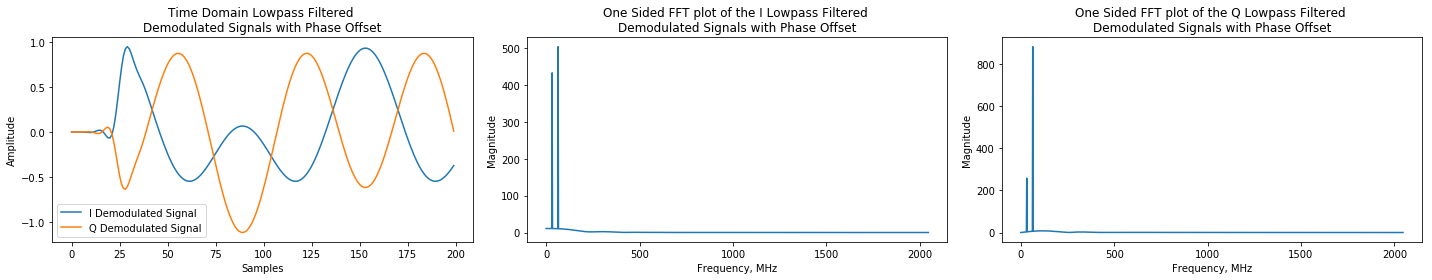

In [21]:
fig, axs = plt.subplots(1,3, figsize=(20,4))
axs[0].plot(z1_phaseshift[:200])
axs[0].plot(z2_phaseshift[:200])
axs[0].set_title('Time Domain Lowpass Filtered \nDemodulated Signals with Phase Offset')
axs[0].set_xlabel('Samples')
axs[0].set_ylabel('Amplitude')
axs[0].legend(('I Demodulated Signal', 'Q Demodulated Signal'))

axs[1].plot(freqs[:int(N_fft/2)]/1e6, np.abs(z1_phaseshift_fft_result[:int(N_fft/2)]))
axs[1].set_title('One Sided FFT plot of the I Lowpass Filtered \nDemodulated Signals with Phase Offset')
axs[1].set_ylabel('Magnitude')
axs[1].set_xlabel('Frequency, MHz')

axs[2].plot(freqs[:int(N_fft/2)]/1e6, np.abs(z2_phaseshift_fft_result[:int(N_fft/2)]))
axs[2].set_title('One Sided FFT plot of the Q Lowpass Filtered \nDemodulated Signals with Phase Offset')
axs[2].set_ylabel('Magnitude')
axs[2].set_xlabel('Frequency, MHz')

fig.tight_layout()

The I and Q signals are interfering with each other due to the phase error. DSP receivers can be designed to calculate these phase errors and correct for them.

## 3.4 Conclusion <a class="anchor" id="conclusion"></a>

Through this notebook we have explored the QAM modulation scheme, and noted how it can be used to transmit two information signals using two orthogonal carriers at the same frequency, thus improving the bandwidth efficiency of a system. In the next notebook, we will explore a complex representation of the QAM scheme, and demonstrate its equivalence to the trigonometric version introduced here.

[⬅️ Previous Notebook](02_amplitude_modulation.ipynb) | | [Next Notebook ➡️](04_complex_QAM.ipynb)

----
----